In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
current_directory = os.getcwd()
print(current_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load the data
data = pd.read_csv('/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/data/full_parameter/edited.csv')

# Preprocessing function
def preprocess_data(data):
    date_time = pd.to_datetime(data['time'], format = 'ISO8601')
    data.set_index(date_time, inplace=True)
    data.drop(['time'], axis=1, inplace=True)
    return data

data = preprocess_data(data)
features =   ['temperature_2m (°C)',
             'relative_humidity_2m (%)',
             'apparent_temperature (°C)',
             'rain (mm)',
             'surface_pressure (hPa)',
             'cloud_cover (%)',
             'cloud_cover_low (%)',
             'cloud_cover_mid (%)',
             'cloud_cover_high (%)',
             'wind_speed_10m (km/h)',
             'wind_speed_100m (km/h)',
             'wind_direction_10m (°)',
             'wind_direction_100m (°)']
target = 'rain (mm)'

data = data.dropna() # Handle missing values if any
data.head()

,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
time,,,,,,,,,,,,,
2001-01-01 00:00:00,22.0,93.0,25.5,0.0,1006.6,41.0,25.0,28.0,4.0,4.6,11.1,141.0,126.0
2001-01-01 01:00:00,21.9,93.0,25.3,0.0,1006.7,25.0,8.0,29.0,0.0,5.1,9.7,129.0,121.0
2001-01-01 02:00:00,23.1,87.0,26.8,0.0,1006.2,38.0,14.0,42.0,0.0,3.6,7.5,96.0,107.0
2001-01-01 03:00:00,22.4,92.0,26.3,0.0,1005.5,38.0,20.0,33.0,0.0,2.9,6.5,60.0,90.0
2001-01-01 04:00:00,21.9,94.0,25.8,0.0,1005.7,52.0,30.0,41.0,0.0,3.1,6.2,45.0,80.0


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),207872.0,26.908016,2.897599,16.4,24.8,26.3,28.8,38.7
relative_humidity_2m (%),207872.0,79.425704,15.313712,21.0,70.0,83.0,92.0,100.0
apparent_temperature (°C),207872.0,31.342036,3.300941,16.4,29.3,31.0,33.3,43.4
rain (mm),207872.0,0.230354,0.844700,0.0,0.0,0.0,0.1,53.4
surface_pressure (hPa),207872.0,1005.522281,2.345127,995.4,1003.9,1005.4,1007.1,1016.6
cloud_cover (%),207872.0,44.532914,27.242284,0.0,26.0,40.0,62.0,100.0
cloud_cover_low (%),207872.0,14.595285,20.108979,0.0,1.0,7.0,19.0,100.0
cloud_cover_mid (%),207872.0,21.982773,25.976349,0.0,3.0,13.0,30.0,100.0
cloud_cover_high (%),207872.0,65.021706,38.296292,0.0,28.0,85.0,98.0,100.0
wind_speed_10m (km/h),207872.0,7.710011,4.032094,0.0,4.7,6.9,10.3,36.4


In [4]:
data['rain (mm)'] = np.log1p(data['rain (mm)']) # Log transform the precipitation

# Split data into features and target
X = data[features].values
y = data[target].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=None)
rf.fit(X_scaled, y)

RandomForestRegressor()

In [6]:
# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                      Feature    Importance
3                   rain (mm)  9.999626e-01
0         temperature_2m (°C)  1.562057e-05
2   apparent_temperature (°C)  1.300037e-05
4      surface_pressure (hPa)  3.937644e-06
6         cloud_cover_low (%)  1.855910e-06
10     wind_speed_100m (km/h)  8.477157e-07
7         cloud_cover_mid (%)  6.099763e-07
9       wind_speed_10m (km/h)  5.627652e-07
5             cloud_cover (%)  3.627476e-07
11     wind_direction_10m (°)  2.709014e-07
1    relative_humidity_2m (%)  1.541819e-07
12    wind_direction_100m (°)  1.270267e-07
8        cloud_cover_high (%)  1.414149e-08


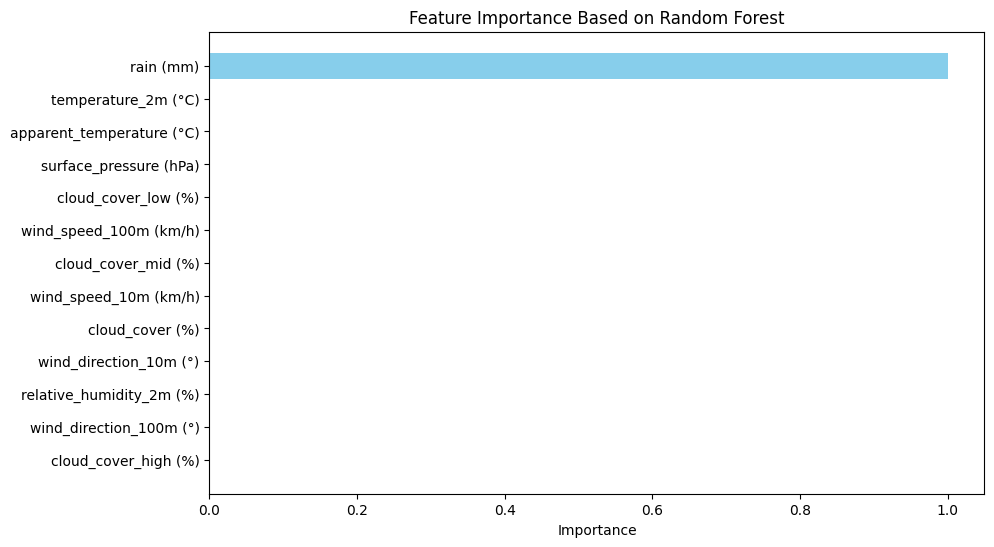

In [7]:
import matplotlib.pyplot as plt
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [8]:
  # Select the top N features (for example, top 3)
top_features = feature_importance['Feature'][:3].values
top_feature_indices = [list(features).index(f) for f in top_features]
print(top_feature_indices)

[3, 0, 2]


In [5]:
top_feature_indices = [3, 0, 2]
X_selected = X_scaled[:, top_feature_indices]

# Create sequences
def create_sequences(X, y, time_steps):
    sequences = []
    labels = []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:(i + time_steps)])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

time_steps = 24
X_seq, y_seq = create_sequences(X_selected, y, time_steps)

In [10]:
print(X_seq)
print(X_seq.shape)

[[[-0.38606986 -1.69382582 -1.76981352]
  [-0.38606986 -1.72833724 -1.83040244]
  [-0.38606986 -1.31420024 -1.37598551]
  ...
  [-0.38606986 -1.52126874 -2.04246368]
  [-0.38606986 -1.6593144  -2.16364153]
  [-0.38606986 -1.79736007 -2.22423045]]

 [[-0.38606986 -1.72833724 -1.83040244]
  [-0.38606986 -1.31420024 -1.37598551]
  [-0.38606986 -1.55578016 -1.52745782]
  ...
  [-0.38606986 -1.6593144  -2.16364153]
  [-0.38606986 -1.79736007 -2.22423045]
  [-0.38606986 -1.90089432 -2.28481938]]

 [[-0.38606986 -1.31420024 -1.37598551]
  [-0.38606986 -1.55578016 -1.52745782]
  [-0.38606986 -1.72833724 -1.67893013]
  ...
  [-0.38606986 -1.79736007 -2.22423045]
  [-0.38606986 -1.90089432 -2.28481938]
  [-0.38606986 -2.00442856 -2.3454083 ]]

 ...

 [[ 0.42269802 -0.72750617 -0.67921288]
  [-0.09226532 -0.72750617 -0.70950734]
  [-0.38606986 -0.58946051 -0.67921288]
  ...
  [ 2.43850121 -0.86555183 -0.5883295 ]
  [ 3.10160666 -1.0035975  -0.73980181]
  [ 4.6362506  -1.0035975  -0.77009627]]

 [

In [6]:
# train-test split
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

In [22]:
# Define the LSTM model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
class LSTMModel(nn.Module):
    def __init__(self, input_size=3,
                 hidden_layer_size=128,
                 hidden_layer_size2=64,
                 output_size=1):
        super(LSTMModel, self).__init__()
        self.input_size = input_size
        self.hidden_layer_size = hidden_layer_size
        self.hidden_layer_size2 = hidden_layer_size2
        self.output_size = output_size
        self.lstm1 = nn.LSTM(input_size = input_size,
                             hidden_size = hidden_layer_size,
                             batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(input_size = hidden_layer_size,
                             hidden_size = hidden_layer_size2,
                             batch_first=True)
        self.fc = nn.Linear(in_features = hidden_layer_size2,
                            out_features = output_size)
        self.relu = nn.ReLU()  # Ensure non-negative outputs

    def forward(self, x):
        lstm1_output, _ = self.lstm1(x)
        x = self.dropout1(lstm1_output)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]  # Take the last output of the sequence
        x = self.fc(x)
        x = self.relu(x)
        return x

In [23]:
checkpoint_path = "/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/precipitation_model"

In [34]:
class EarlyStoppingWithCheckpoint:
    def __init__(self, patience, checkpoint_path, verbose):
        self.patience = patience
        self.best_val_loss = float("inf")
        self.patience_counter = 0
        self.checkpoint_path = checkpoint_path
        self.verbose = verbose
        self.early_stop = False
        self.counter = 0
        self.best_score = None
        self.val_loss_min = float('inf')
        os.makedirs(self.checkpoint_path, exist_ok=True)
        self.best_model_path = os.path.join(self.checkpoint_path, "/content/drive/My Drive/Project_2/Weather_prediction/10_features_24_steps/checkpoint/best_model.pth")

    def __call__(self, model, epoch, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, epoch, model)

        elif score < self.best_score:
            self.counter += 1
            # print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, epoch, model)
            self.counter = 0

        return self.early_stop

    def save_checkpoint(self, val_loss, epoch, model):
        if self.val_loss_min > val_loss:
            self.val_loss_min = val_loss
            # Save checkpoint for each epoch
            checkpoint_path = os.path.join(self.checkpoint_path, f"model_epoch_{epoch+1:02d}.pth")
            torch.save(model.state_dict(), checkpoint_path)
            # Save the best model
            torch.save(model.state_dict(), self.best_model_path)


In [35]:
def train_model(model, X_train, y_train,
                X_val, y_val, epochs,
                batch_size, lr, patience,
                checkpoint_path):
    # Convert data to tensors within the function
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)

    # Create DataLoader
    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    # Define optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    early_stopping = EarlyStoppingWithCheckpoint(patience=patience, checkpoint_path=checkpoint_path, verbose = True)

    # Ensure checkpoint directory exists
    os.makedirs(checkpoint_path, exist_ok=True)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            # y_pred = y_pred[:, -1, :]
            loss = criterion(y_pred.squeeze(), y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Validation loss calculation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            # y_val_pred = y_val_pred[:, -1, :]
            y_val_pred = y_val_pred.squeeze()
            val_loss = criterion(y_val_pred, y_val).item()
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Val Loss: {val_loss:.4f}")

        # Call EarlyStoppingWithCheckpoint
        if early_stopping(model, epoch, val_loss):
            # Early stopping triggered; break the loop
            break
    # Load the best model before returning
    model.load_state_dict(torch.load(early_stopping.best_model_path))
    return model

In [11]:
# Splitting train and validation sets
val_size = int(len(X_train) * 0.1)
X_val, X_train = X_train[:val_size], X_train[val_size:]
y_val, y_train = y_train[:val_size], y_train[val_size:]

In [36]:
model = LSTMModel(input_size=3)

In [37]:
train_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=72, lr=0.001, patience=10, checkpoint_path=checkpoint_path)

Epoch [1/100], Loss: 0.1148, Val Loss: 0.0988


KeyboardInterrupt: 

In [34]:
# Make predictions
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(X_test_tensor).squeeze().numpy()

In [36]:
# Inverse log transform the predictions and true values
y_pred_inverse = np.expm1(y_pred)
y_test_inverse = np.expm1(y_test)

In [39]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 1.3203452008660088
Mean Absolute Error (MAE): 0.28509742602838584
R-squared: -0.06559830576066616
